In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# 0-x
# 1-y
# 2-z
y = []

with open('dist/iphone-calibration.csv', 'r') as fr:
  csvreader = csv.reader(fr, delimiter=';')

  index = 0
  for row in csvreader:
    index += 1
    if index == 1:
      continue

    y.append(list(map(lambda v: float(v.replace(',', '.')), row[1:4])))

y = np.array(y)
print(y[:5])
print('y.shape =', y.shape)

[[ -8.88  -9.54 -53.26]
 [ -9.27  -9.99 -53.38]
 [ -9.74  -9.48 -53.38]
 [-11.31  -8.79 -53.2 ]
 [-15.44  -6.52 -52.3 ]]
y.shape = (603, 3)


In [2]:
L = []
for r in y:
  L.append([ r[0]**2, r[0]*r[1], r[0]*r[2], r[1]**2, r[1]*r[2], r[0], r[1], r[2], 1 ])
L = np.array(L)
print(L[:5])
print('L.shape =', L.shape)

[[ 78.8544  84.7152 472.9488  91.0116 508.1004  -8.88    -9.54   -53.26
    1.    ]
 [ 85.9329  92.6073 494.8326  99.8001 533.2662  -9.27    -9.99   -53.38
    1.    ]
 [ 94.8676  92.3352 519.9212  89.8704 506.0424  -9.74    -9.48   -53.38
    1.    ]
 [127.9161  99.4149 601.692   77.2641 467.628  -11.31    -8.79   -53.2
    1.    ]
 [238.3936 100.6688 807.512   42.5104 340.996  -15.44    -6.52   -52.3
    1.    ]]
L.shape = (603, 9)


In [3]:
b = np.array(list(map(lambda r: r[2]**2, y)))
b.shape = (b.shape[0], 1)
print(b[:5])
print('b.shape =', b.shape)

[[2836.6276]
 [2849.4244]
 [2849.4244]
 [2830.24  ]
 [2735.29  ]]
b.shape = (603, 1)


In [4]:
p = np.linalg.inv(np.transpose(L) @ L) @ np.transpose(L) @ b

print(p)
print('p.shape =', p.shape)

[[-1.04064464e+00]
 [-6.84464199e-02]
 [-7.72773853e-03]
 [-9.40092178e-01]
 [ 1.35881364e-02]
 [-1.83447201e+00]
 [-4.46200000e-01]
 [-2.18026360e+00]
 [ 2.88821886e+03]]
p.shape = (9, 1)


In [5]:
A, B, C, D, E, G, H, I, J = np.transpose(p)[0]
print(A, B, C, D, E, G, H, I, J)

-1.0406446423654294 -0.06844641988586858 -0.007727738528614053 -0.9400921775591867 0.013588136404898206 -1.8344720139405624 -0.4462000001755859 -2.1802636033761686 2888.2188567120743


In [6]:
alpha1 = -B**2 + D*C**2 + 4*D*A + A*E**2 - B*E*C

alpha2 = 4*A*E**2*J - E**2*G**2 - 4*B*E*C*J + 2*E*C*H*G + \
  2*B*E*I*G - 4*E*H*A*I - 4*D*I*C*G - C**2*H**2 + \
  4*D*A*I**2 + 2*C*B*H*I - 4*D*G**2 + 4*D*C**2*J + \
  4*B*H*G - 4*A*H**2 - B**2*I**2 - 4*B**2*J + 16*D*A*J

alpha3 = E**4*A - C*B*E**3 + E**2*C**2*D - 2*B**2*E**2 + \
  8*D*A*E**2 - 4*D*B**2 + 16*D**2*A

print('alpha1 =', alpha1)
print('alpha2 =', alpha2)
print('alpha3 =', alpha3)

beta1 = 2*B*H + B*E*I - 2*C*D*I - 4*D*G + E*C*H - E**2*G
beta2 = -2*A*E*I + 4*A*H - B*C*I - 2*B*G + C**2*H - C*E*G
beta3 = 4*D*I*A - 2*D*G*C + E*G*B - I*B**2 - 2*E*H*A + C*B*H

print('beta1 =', beta1)
print('beta2 =', beta2)
print('beta3 =', beta3)

alpha1 = 3.908267169631295
alpha2 = 45183.494047766566
alpha3 = -14.696042963672262
beta1 = -6.803117936395392
beta2 = 1.545490727016449
beta3 = -8.506104313632525


In [7]:
_a = 1 / (2 * alpha1) * (-(4*D + E**2) * alpha2)**0.5
_b = 1 / (2 * alpha1) * (-(4*A + C**2) * alpha2)**0.5
_c = 1 / (2 * alpha1) * ((4*D*A - B**2) * alpha2)**0.5

print('_a =', _a)
print('_b =', _b)
print('_c =', _c)

tanpi = -1 / (2 * alpha1) * (2*B + E*C) * alpha1**(-0.5)
tanphi = (B*E - 2*C*D) * alpha1**(-0.5)
tanla = E * (-alpha1*alpha3**(-1))**0.5

print('tanpi =', tanpi)
print('tanphi =', tanphi)
print('tanla =', tanla)

pi = np.arctan(tanpi)
phi = np.arctan(tanphi)
la = np.arctan(tanla)

print('pi =', pi)
print('phi =', phi)
print('la =', la)

secpi = 1 / np.cos(pi)
secphi = 1 / np.cos(phi)
secla = 1 / np.cos(la)

print('secpi =', secpi)
print('secphi =', secphi)
print('secla =', secla)

_a = 52.73272551107827
_b = 55.482212644377704
_c = 53.762812724947324
tanpi = 0.008865584516980909
tanphi = -0.007820005166541258
tanla = 0.007007317789431428
pi = 0.00886535225379009
phi = -0.007819845768151168
la = 0.00700720310053032
secpi = 1.000039298522227
secphi = 1.0000305757729633
secla = 1.0000245509499266


In [8]:
T0 = np.array([
  [ 1/_a, 0, 0],
  [ -1/_a * tanpi, -1/_b * secpi, 0],
  [
    1/_a * (tanpi*tanla*secphi - tanphi),
    -1/_b * secpi * tanla * secphi,
    1/_c * secla * secphi
  ],
])
print(T0)
print('T0.shape =', T0.shape)

h0 = 1/(2 * alpha1) * np.array([beta1, beta2, beta3])
h0.shape = (3, 1)
print(h0)
print('h0.shape =', h0.shape)

[[ 0.01896356  0.          0.        ]
 [-0.00016812 -0.0180245   0.        ]
 [ 0.00014947 -0.00012631  0.01860124]]
T0.shape = (3, 3)
[[-0.87034965]
 [ 0.19772071]
 [-1.0882194 ]]
h0.shape = (3, 1)


In [9]:
x1 = np.matrix(T0).flatten()
x2 = np.transpose(h0)

x = np.transpose(np.hstack((x1, x2)))

print(x)
print('x.shape =', x.shape)

[[ 1.89635561e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.68123010e-04]
 [-1.80245028e-02]
 [ 0.00000000e+00]
 [ 1.49473234e-04]
 [-1.26307281e-04]
 [ 1.86012427e-02]
 [-8.70349651e-01]
 [ 1.97720711e-01]
 [-1.08821940e+00]]
x.shape = (12, 1)


In [10]:
SIGMA = 0.2522260688
sigma2 = SIGMA ** 2

In [11]:
should_log = True
should_log_2 = True

def get_grads(T_circum, h):
  global should_log

  def get_ck_uk(k):
    global should_log_2

    yk = y[k]
    yk.shape = (3, 1)

    uk = yk - h

    ck = 1 - np.linalg.norm(T_circum @ uk)**(-1)

    if should_log_2:
      should_log_2 = False
      print(yk)
      print('yk.shape =', yk.shape)
      print(uk)
      print('uk.shape =', uk.shape)
      print('ck =', ck)

    return (ck, uk)

  ck, uk = get_ck_uk(0)

  grad_T_circum = np.kron(2 * ck / sigma2 * uk, T_circum @ uk)

  grad_h = (-2 * ck / sigma2 * np.transpose(T_circum)) @ T_circum @ uk

  H_TT = 0
  H_Th = 0
  H_hh = 0



  for k in range(1, len(y)):
    ck, uk = get_ck_uk(k)

    grad_T_circum += np.kron(2 * ck / sigma2 * uk, T_circum @ uk)
    grad_h += (-2 * ck / sigma2 * np.transpose(T_circum)) @ T_circum @ uk

    H_TT += 2 / sigma2 * (
      np.kron(
        uk @ np.transpose(uk),
        T_circum @ uk @ np.transpose(uk) @ np.transpose(T_circum)
      ) / np.linalg.norm(
        T_circum @ uk
      ) ** 3
      +
      ck * np.kron(
        uk @ np.transpose(uk),
        np.identity(3)
      )
    )

    H_Th += -2 / sigma2 * (
      np.kron(uk, T_circum @ uk) @ np.transpose(uk) @ np.transpose(T_circum) @ T_circum
      / np.linalg.norm(
        T_circum @ uk
      ) ** 3
      +
      ck * (
        np.kron(uk, T_circum)
        +
        np.kron(
          np.identity(3),
          T_circum @ uk
        )
      )
    )

    H_hh += 2 / sigma2 * (
      np.transpose(T_circum) @ T_circum @ uk @  np.transpose(uk) @ np.transpose(T_circum) @ T_circum
      / np.linalg.norm(
        T_circum @ uk
      ) ** 3
      +
      ck * (np.transpose(T_circum) @ T_circum)
    )

  grad_x = np.vstack((grad_T_circum, grad_h))
  grad_2_x = np.vstack((
    np.hstack((H_TT, H_Th)),
    np.hstack((np.transpose(H_Th), H_hh))
  ))

  if should_log:
    should_log = False
    print(grad_T_circum)
    print('grad_T_circum.shape =', grad_T_circum.shape)
    print(grad_h)
    print('grad_h.shape =', grad_h.shape)
    print(grad_x)
    print('grad_x.shape =', grad_x.shape)
    print(H_TT)
    print('H_TT.shape =', H_TT.shape)
    print(H_Th)
    print('H_Th.shape =', H_Th.shape)
    print(H_hh)
    print('H_hh.shape =', H_hh.shape)
    print(grad_2_x)
    print('grad_2_x.shape =', grad_2_x.shape)

  return (grad_x, grad_2_x)

In [12]:
T_circum = np.linalg.inv(T0)
print(T_circum)
print('T_circum.shape =', T_circum.shape)

data_X = []
counts = 20
for i in range(counts):
  (grad_x, grad_2_x) = get_grads(T_circum, h0)
  x -= np.linalg.inv(grad_2_x) @ grad_x
  T_circum = x[:9].reshape(3, 3)
  h0 = x[9:]

  # Jx = 0
  # for i in range(1, len(y)):
  #   Jx += (
  #     (
  #       np.linalg.norm(
  #         np.matmul(
  #           T_circum,
  #           y[i] - h0
  #         )
  #       ) - 1
  #     ) / SIGMA
  #   ) ** 2

  data_X.append(np.copy(x))

[[ 52.73272551   0.           0.        ]
 [ -0.49186292 -55.48003236  -0.        ]
 [ -0.42708205  -0.37672387  53.75984908]]
T_circum.shape = (3, 3)
[[ -8.88]
 [ -9.54]
 [-53.26]]
yk.shape = (3, 1)
[[ -8.00965035]
 [ -9.73772071]
 [-52.1717806 ]]
uk.shape = (3, 1)
ck = 0.999652924783141
[[ 1.27206365e+09]
 [-1.05573509e+07]
 [ 8.50962167e+07]
 [-1.24302461e+06]
 [-2.85832484e+08]
 [ 1.58793301e+08]
 [ 9.35672774e+07]
 [-1.66739715e+08]
 [ 1.33473247e+09]]
grad_T_circum.shape = (9, 1)
[[ 1.67158282e+09]
 [ 1.10184688e+06]
 [-5.49465964e+07]]
grad_h.shape = (3, 1)
[[ 1.27206365e+09]
 [-1.05573509e+07]
 [ 8.50962167e+07]
 [-1.24302461e+06]
 [-2.85832484e+08]
 [ 1.58793301e+08]
 [ 9.35672774e+07]
 [-1.66739715e+08]
 [ 1.33473247e+09]
 [ 1.67158282e+09]
 [ 1.10184688e+06]
 [-5.49465964e+07]]
grad_x.shape = (12, 1)
[[ 2.41266684e+07 -9.04481862e+01  4.47506191e+02 -2.59890730e+04
  -6.40343194e+02  2.19733940e+02  1.76172133e+06 -2.36065007e+02
   1.99930410e+03]
 [-9.04481862e+01  2.41215

In [13]:
last_x = data_X[-1]
last_T_circum = np.array(last_x[:9]).reshape(3, 3)
last_T = np.linalg.inv(np.array(last_x[:9]).reshape(3, 3))
last_h = np.array(last_x[9:]).reshape(3, 1)

print(last_T.reshape(9))
print(last_h.reshape(3))

[-2.78787449e-06 -1.35573936e-05  7.13014430e-06  1.00739246e-04
  3.71584038e-04 -2.48157157e-04 -4.22630374e-05 -1.75755163e-04
  1.13677278e-04]
[ 25.80209132  33.81487825 142.23953796]


[[-1.41528382e+01  2.53866595e-01  2.29716917e+00  3.70972728e-02
   5.54526486e+01  3.76672076e-01 -6.94370681e-01  5.83202572e-02
  -5.41973988e+01 -1.55286682e+01  1.52680245e-01 -3.10164597e+00]
 [-1.41517187e+01  6.58682691e-01  1.09708926e+00 -7.21655598e-01
   1.39458526e-02  4.00543401e-01 -2.32720493e+00 -4.91521856e-01
   1.01966350e+00 -3.18260620e+01 -3.77516367e-01 -6.43648656e+00]
 [ 2.45715907e-01  1.43989454e+00  3.57860562e+00 -1.14116113e+00
   3.95978374e-02  9.85582257e-01 -3.82542157e+00 -9.71454692e-01
  -2.05996066e-01 -3.16332091e+01  9.51123709e-01 -2.34518574e+01]
 [-7.62266698e+01 -2.67544855e+01 -1.33987995e+01 -6.71783598e+01
  -2.63149027e+01 -1.99658925e+01 -1.35764988e+02 -2.78182676e+01
   3.57978155e+01 -5.07492157e+02 -4.83384512e+02 -1.44834716e+03]
 [-5.81222290e+01 -2.20653846e+01  1.01170856e+02 -5.94517521e+01
  -2.04155549e+01  6.06617934e-01 -1.28483964e+02 -1.43733074e+01
  -2.64394637e+00 -3.48721597e+02 -3.21810414e+02 -9.64858829e+02]]
(20,

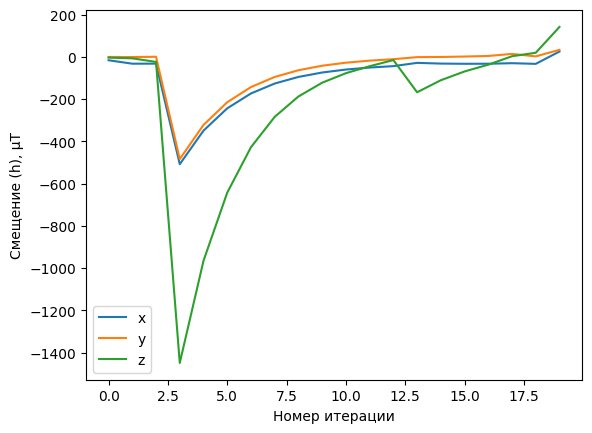

In [14]:
from functools import reduce

data = np.array(list(map(lambda x: list(map(lambda x1: x1[0], x.tolist())), data_X)))

print(data[:5])
print(data.shape)

x = range(counts)

y = list(map(lambda k: k[9], data))
plt.plot(x, y, label='x')

y = list(map(lambda k: k[10], data))
plt.plot(x, y, label='y')

y = list(map(lambda k: k[11], data))
plt.plot(x, y, label='z')

plt.ylabel('Смещение (h), µT')
plt.xlabel('Номер итерации')
plt.legend()
plt.show()

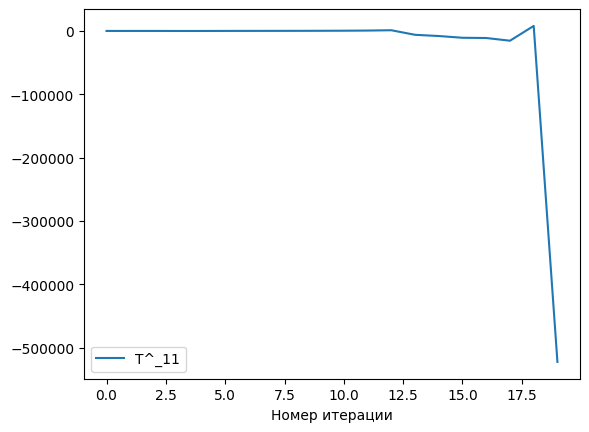

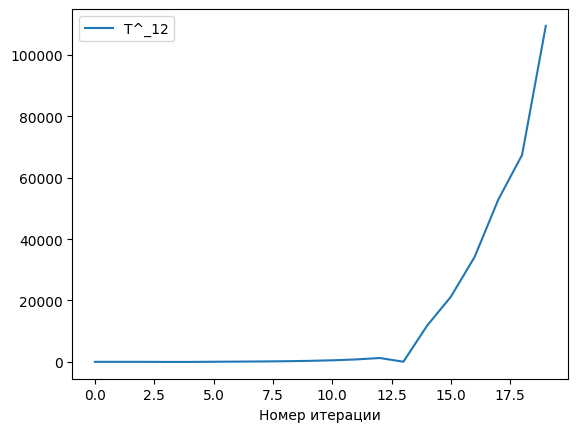

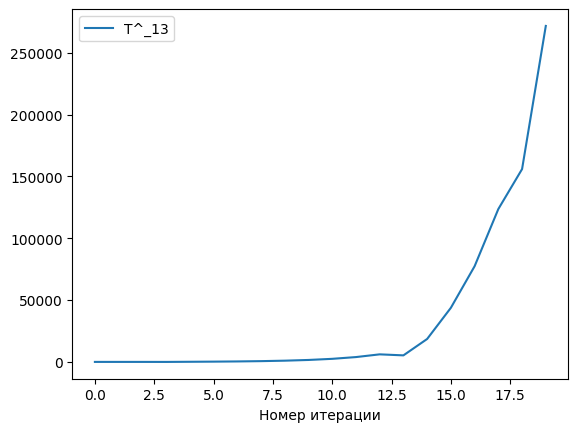

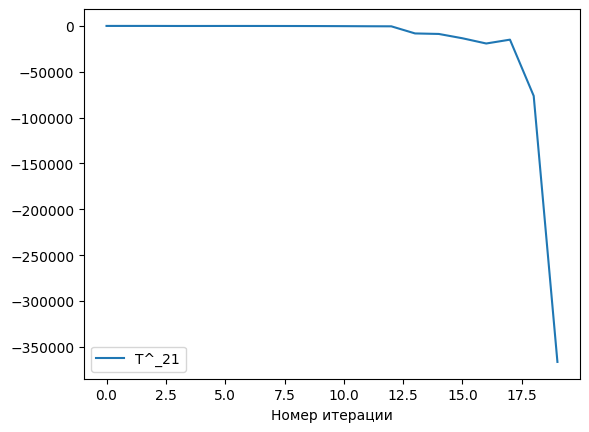

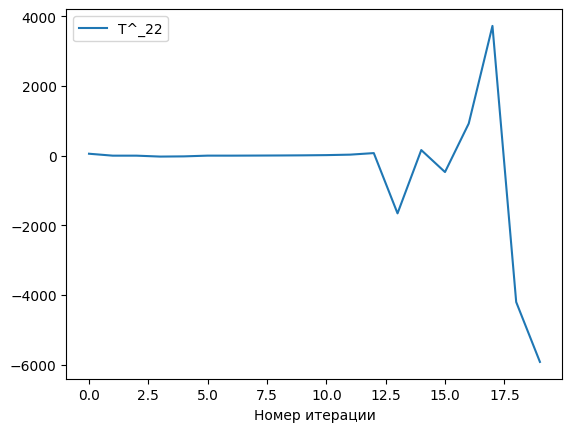

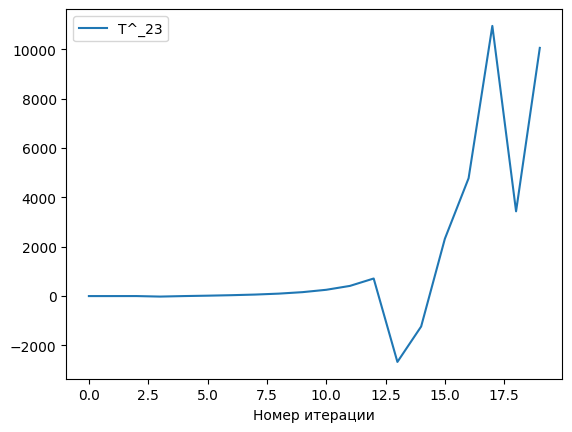

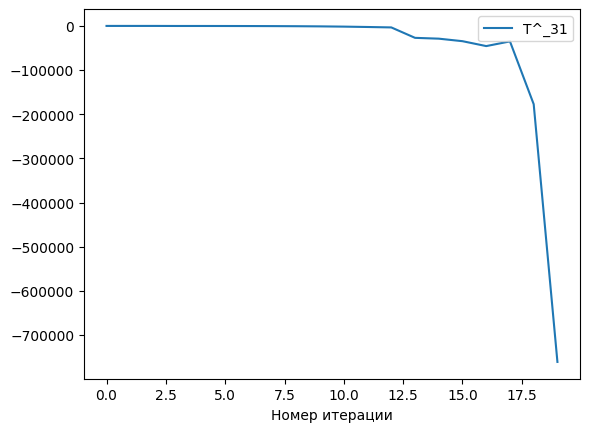

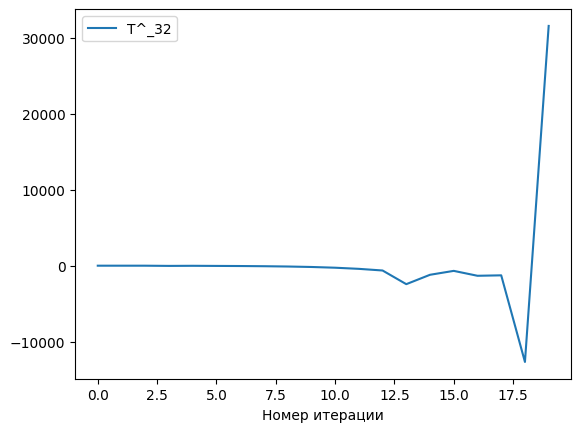

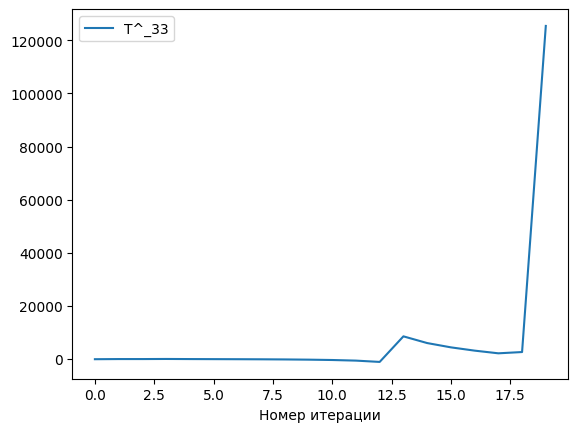

In [15]:
labels = ['T^_11', 'T^_12', 'T^_13', 'T^_21', 'T^_22', 'T^_23', 'T^_31', 'T^_32', 'T^_33']

for i in range(9):
  y = list(map(lambda k: k[i], data))
  plt.plot(x, y, label=labels[i])
  plt.legend()
  plt.xlabel('Номер итерации')
  plt.show()

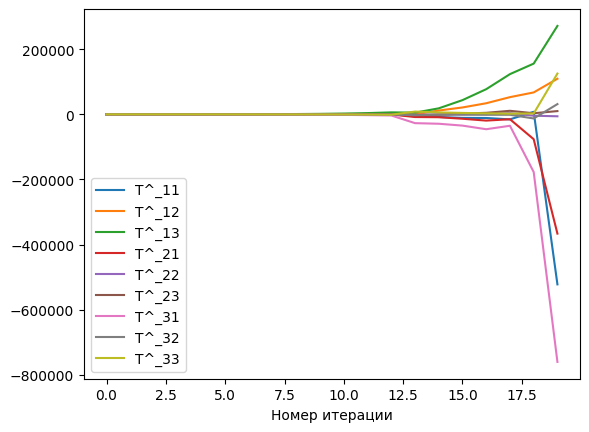

In [16]:
for i in range(9):
  y = list(map(lambda k: k[i], data))
  plt.plot(x, y, label=labels[i])

plt.legend()
plt.xlabel('Номер итерации')
plt.show()